In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#Let's start with importing necessary libraries
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#read the data file
data = pd.read_csv("C:/Users/PUJAN/Downloads/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


It seems that there are no missing values in our data. Great, let's see the distribution of data:

C:\Users\PUJAN\AppData\Local\Temp\ipykernel_6240\3229022652.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\PUJAN\AppData\Local\Temp\ipykernel_6240\3229022652.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\PUJAN\AppData\Local\Temp\ipykernel_

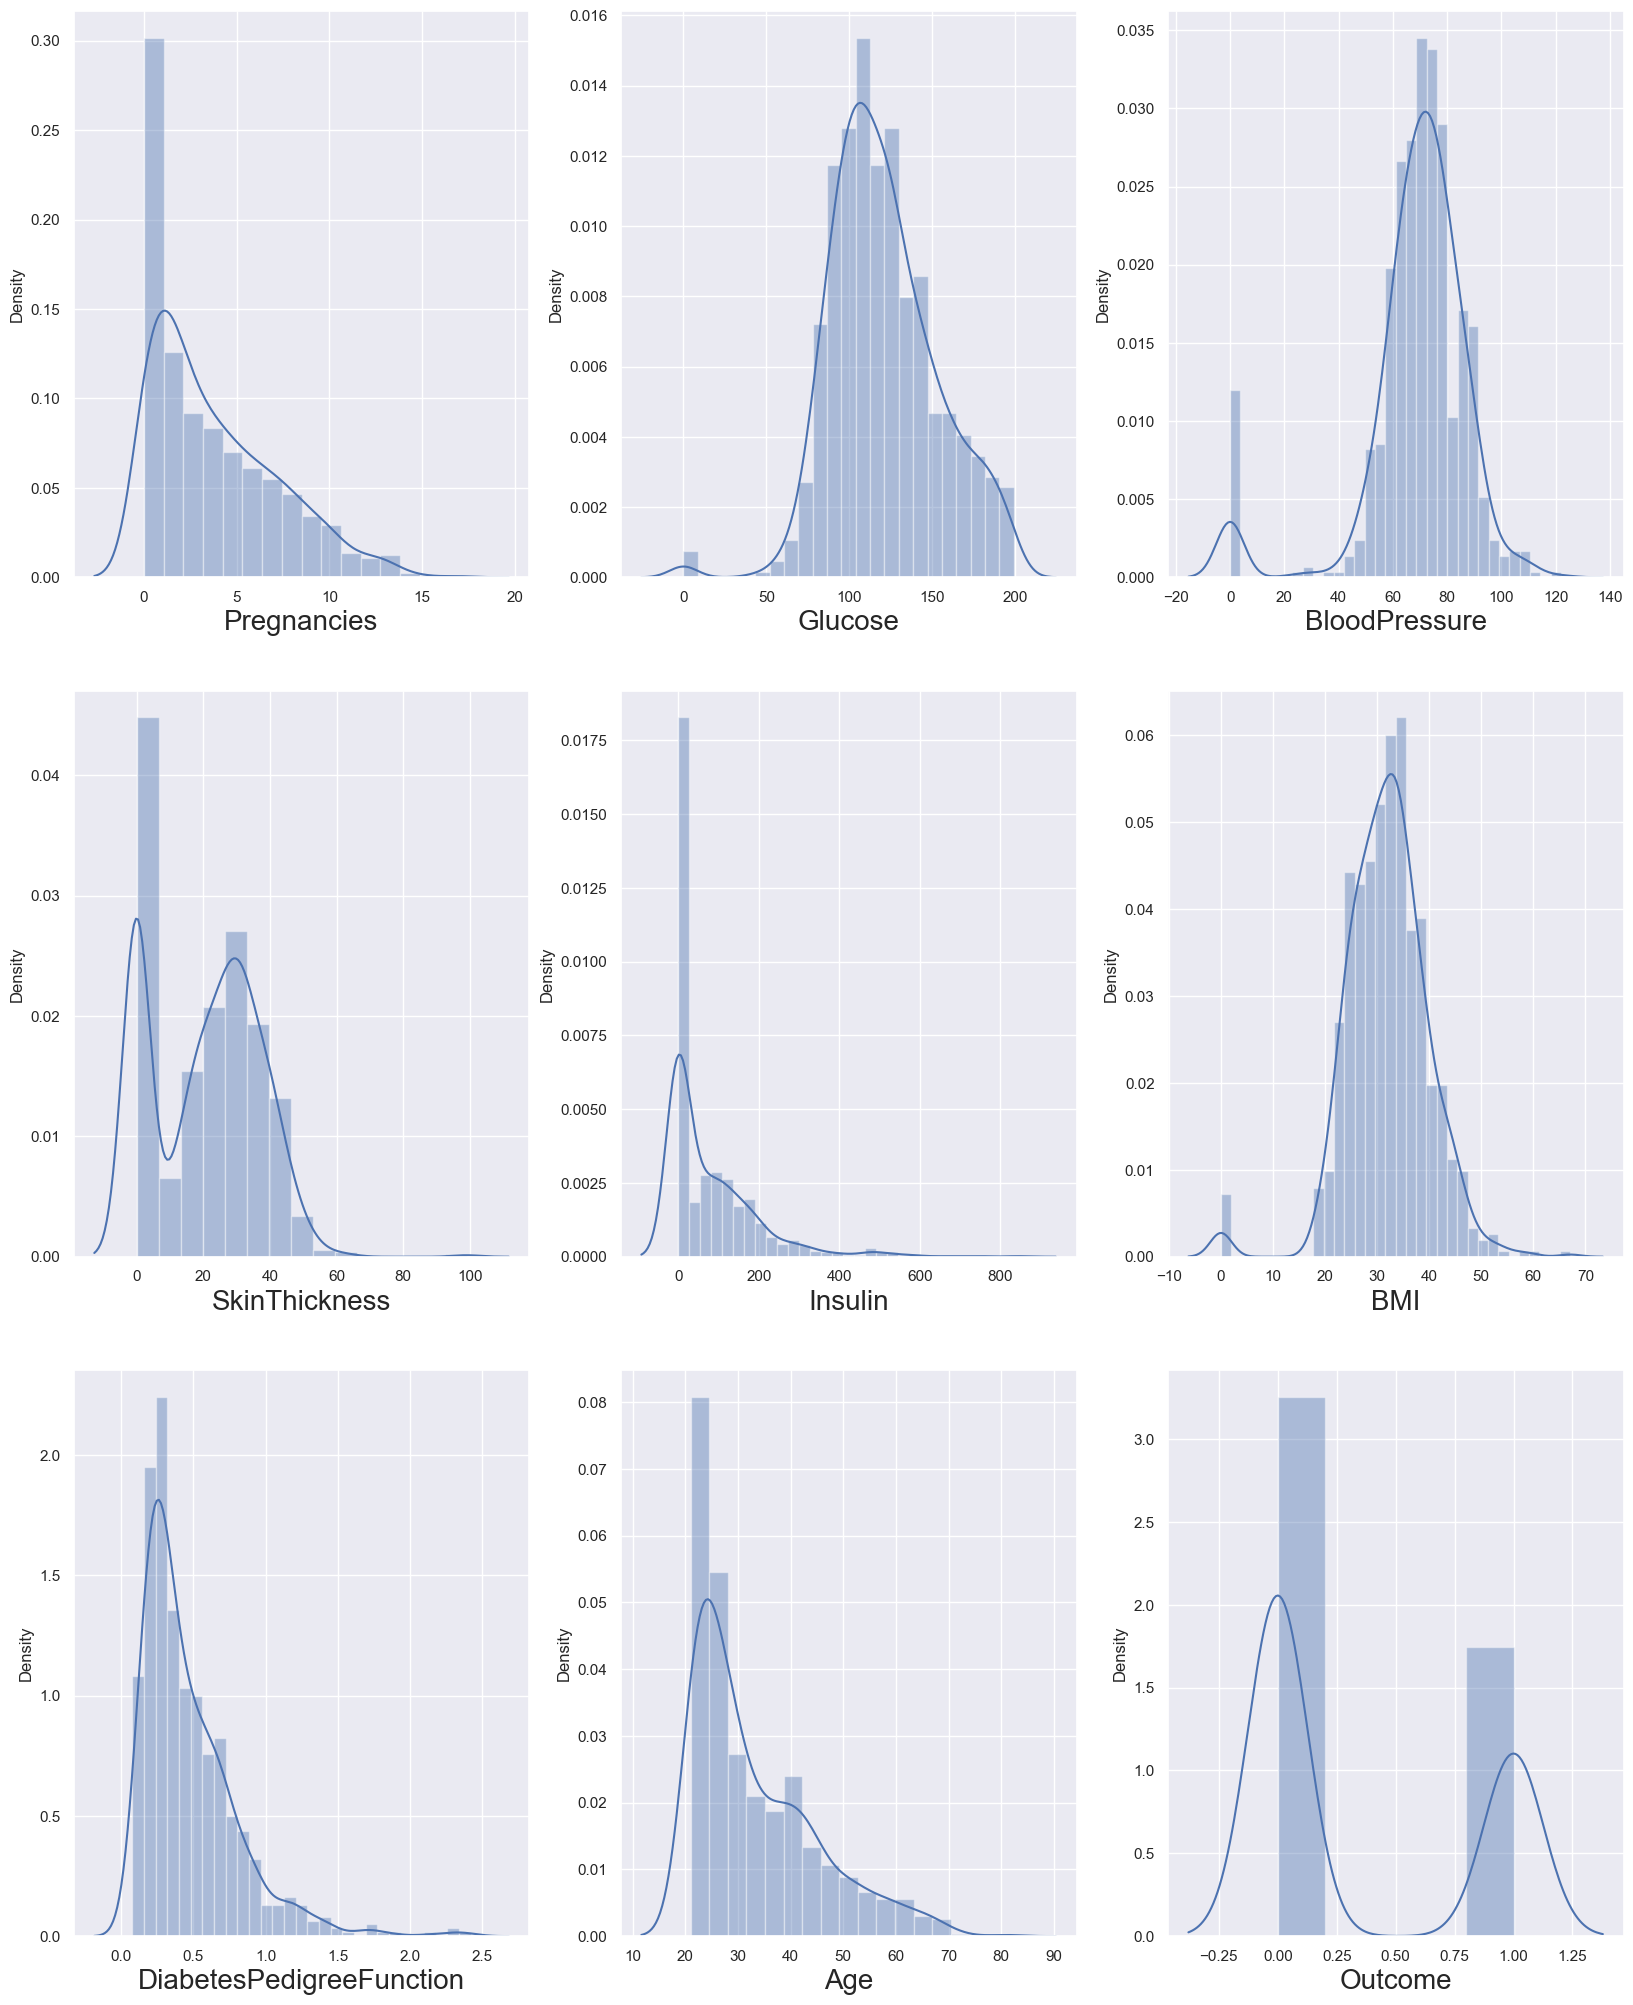

In [4]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

We can see there is some skewness in the data, let's deal with data.

Also, we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these.
Let's deal with that. we can either remove such data or simply replace it with their respective mean values.
Let's do the latter.


In [5]:
# replacing zero values with the mean of the column

#ama pregnancies ma outlayer chhe pan apde preg imp hoi chhe etla anu mean na lidhu
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

C:\Users\PUJAN\AppData\Local\Temp\ipykernel_6240\4289179934.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\PUJAN\AppData\Local\Temp\ipykernel_6240\4289179934.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\PUJAN\AppData\Local\Temp\ipykernel_

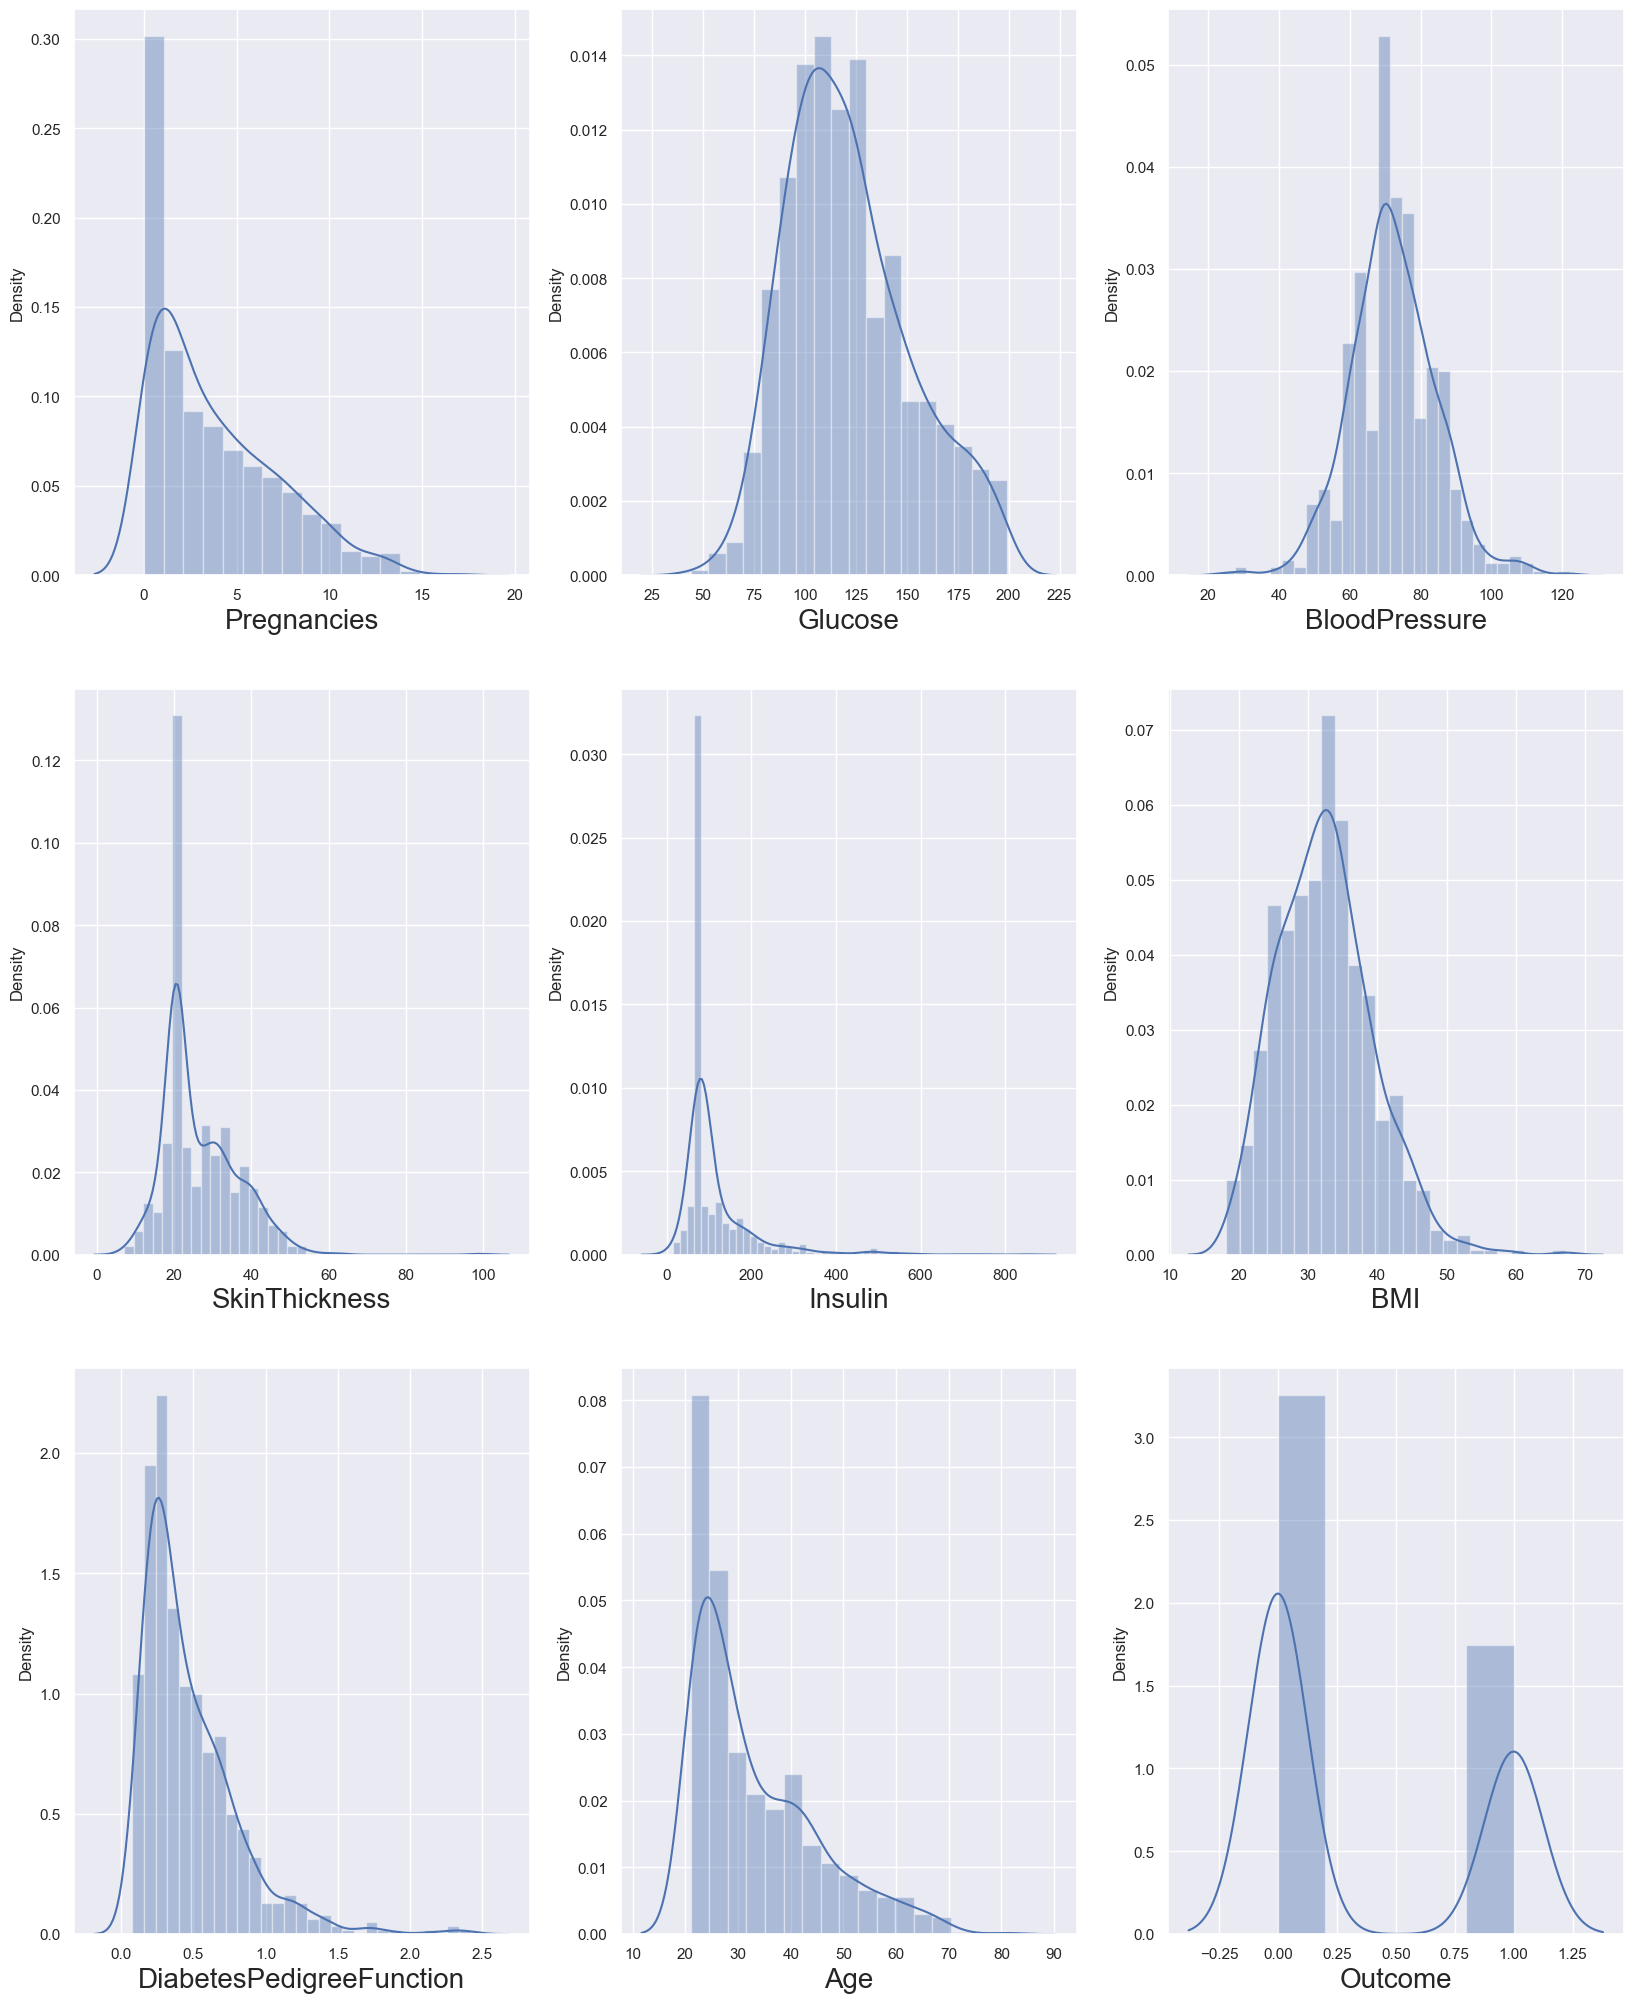

In [6]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot: >

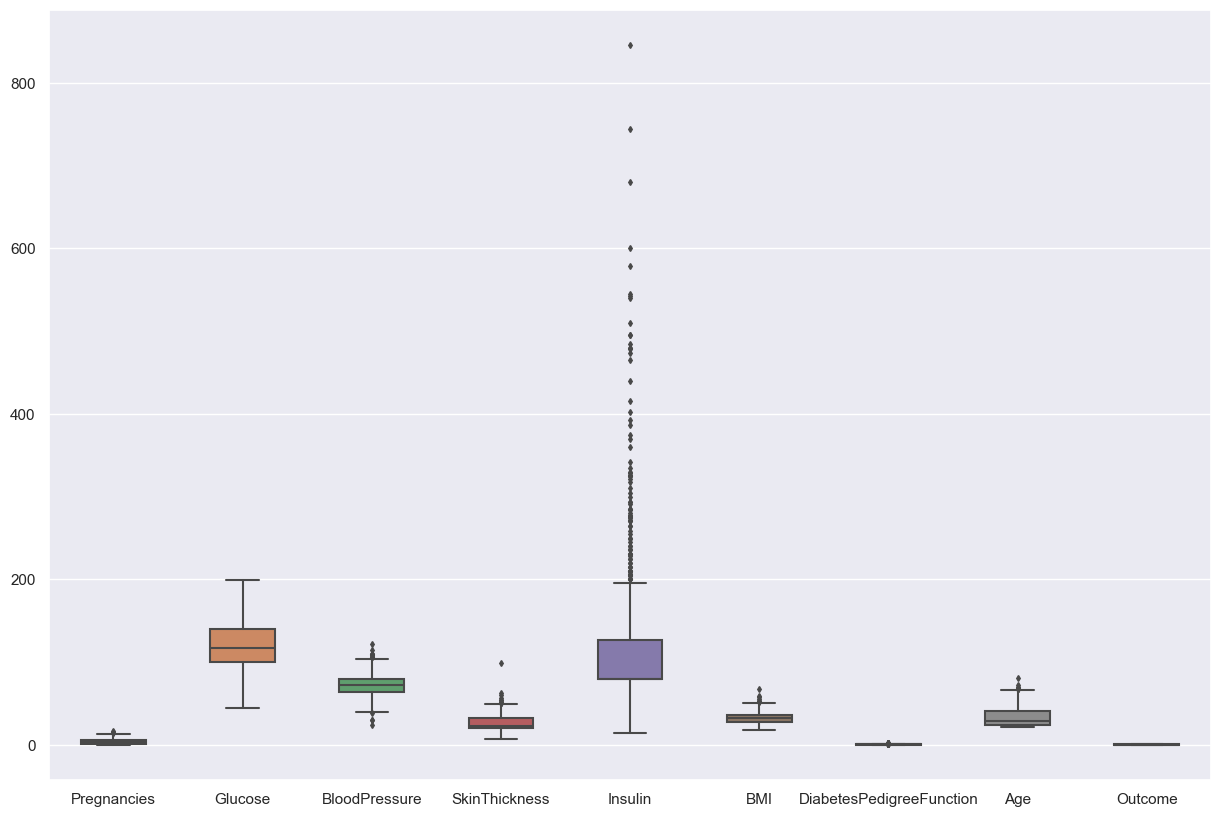

In [7]:

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)


In [8]:

#deleting upper value data to remove outliars
q = data['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data[data['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

C:\Users\PUJAN\AppData\Local\Temp\ipykernel_6240\762150393.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned[column])
C:\Users\PUJAN\AppData\Local\Temp\ipykernel_6240\762150393.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned[column])
C:\Users\PUJAN\AppData\Local\T

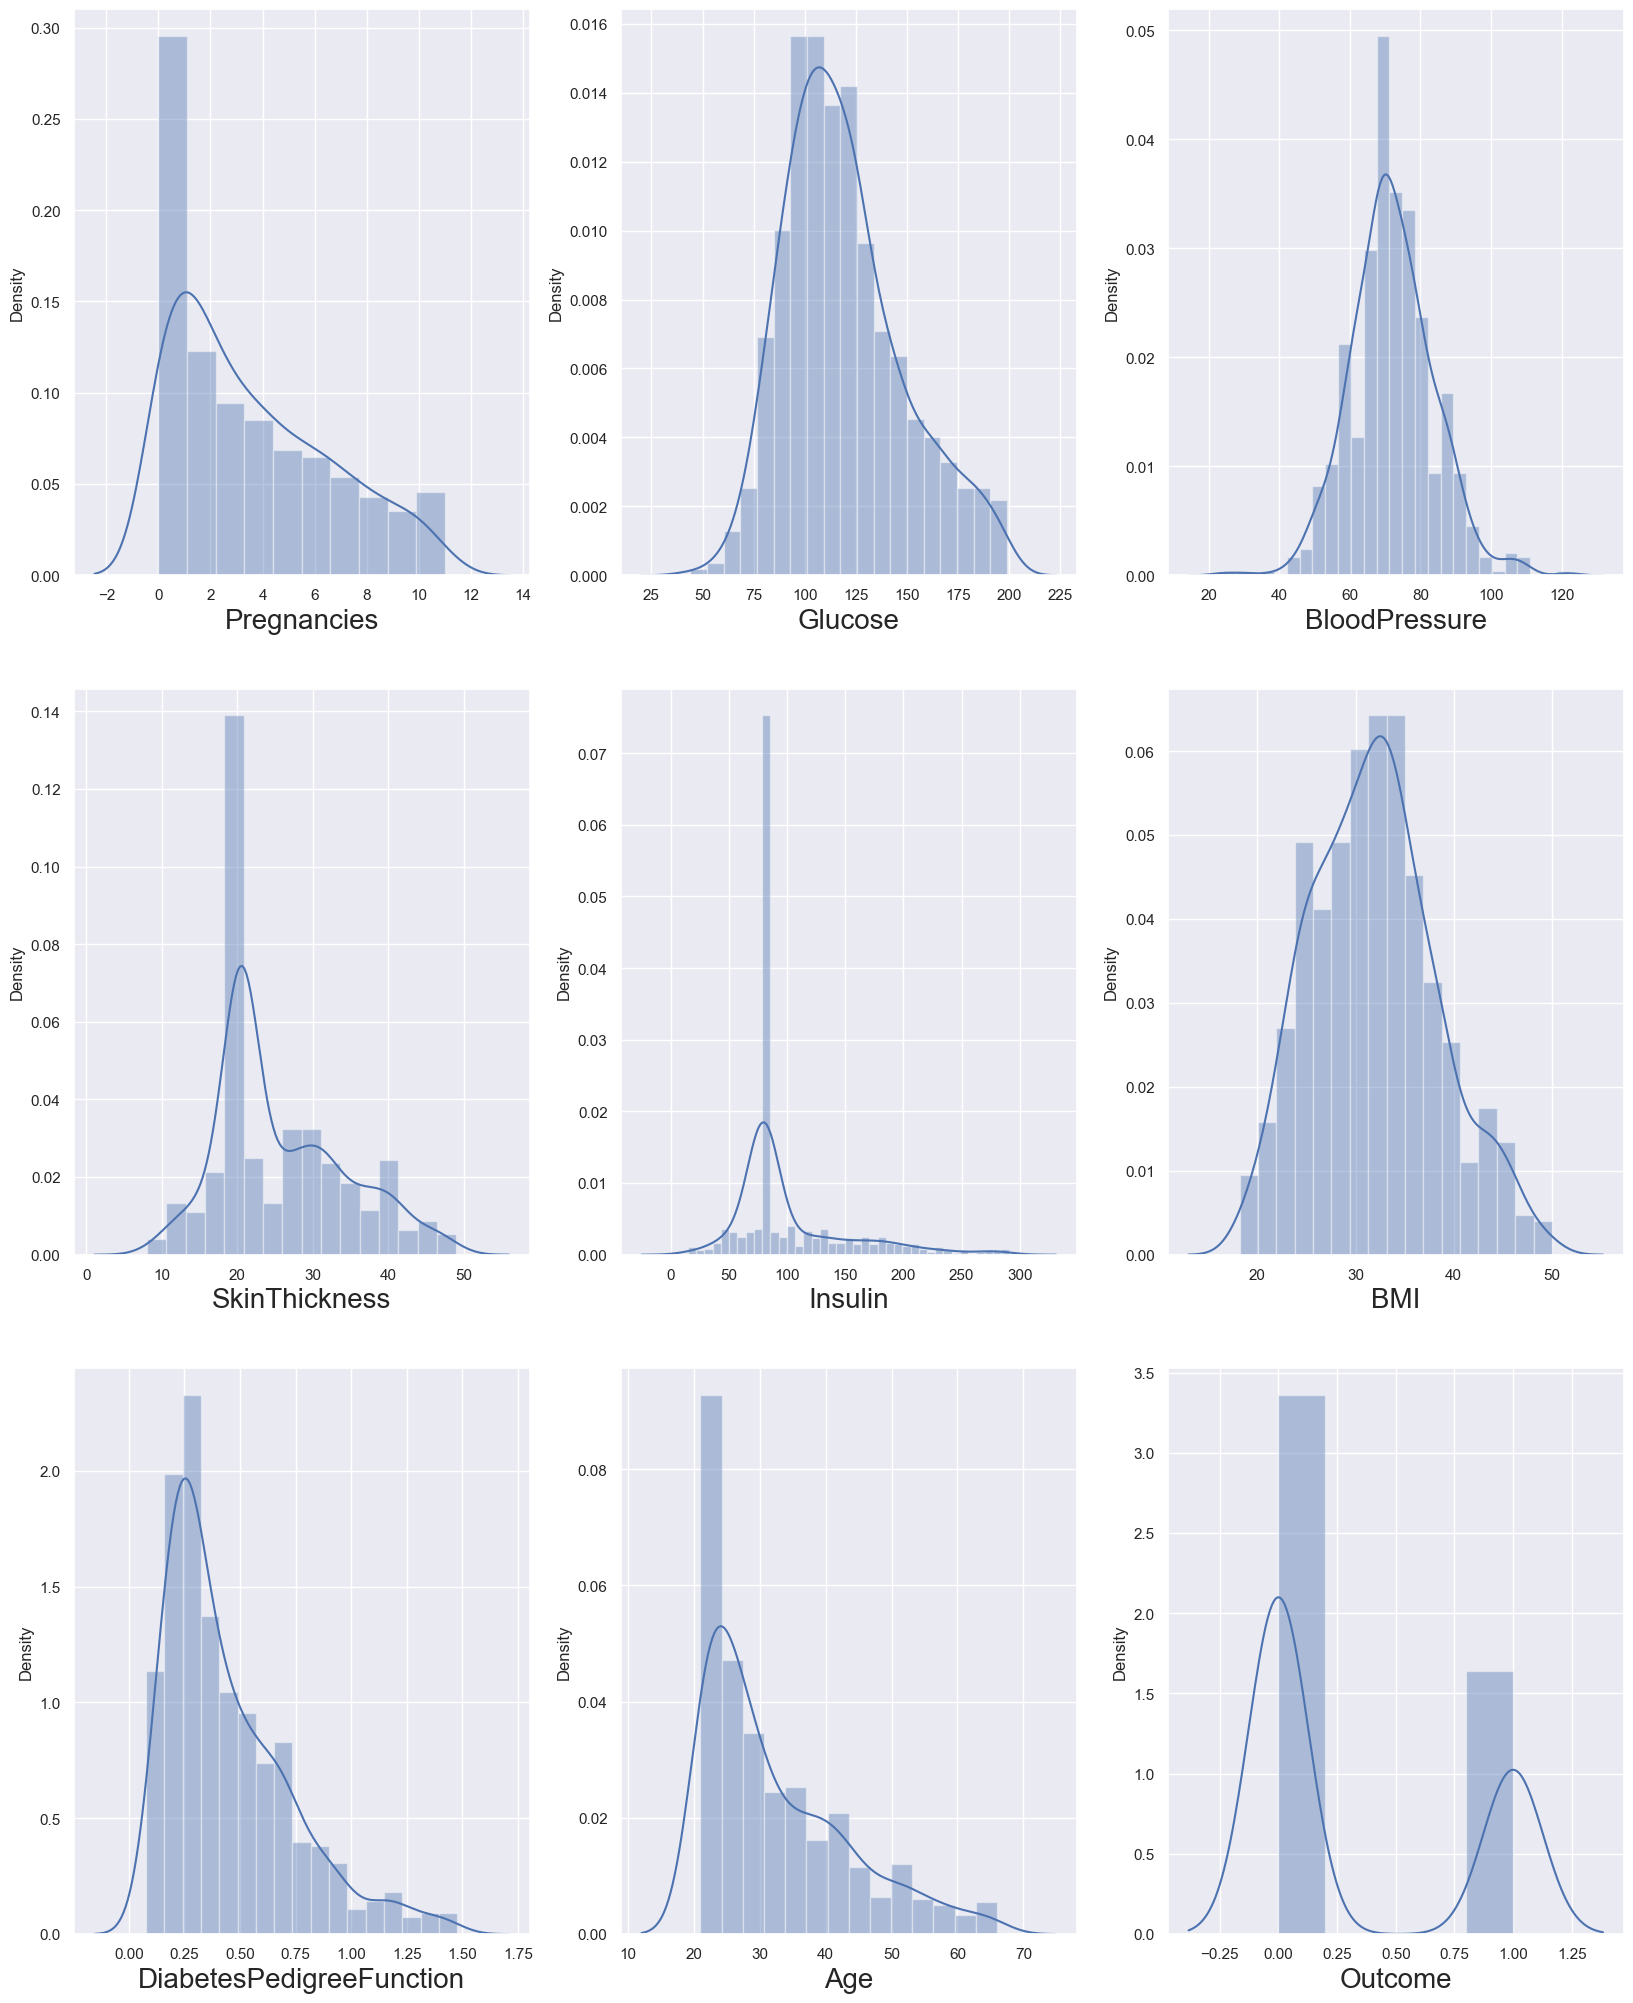

In [9]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [10]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

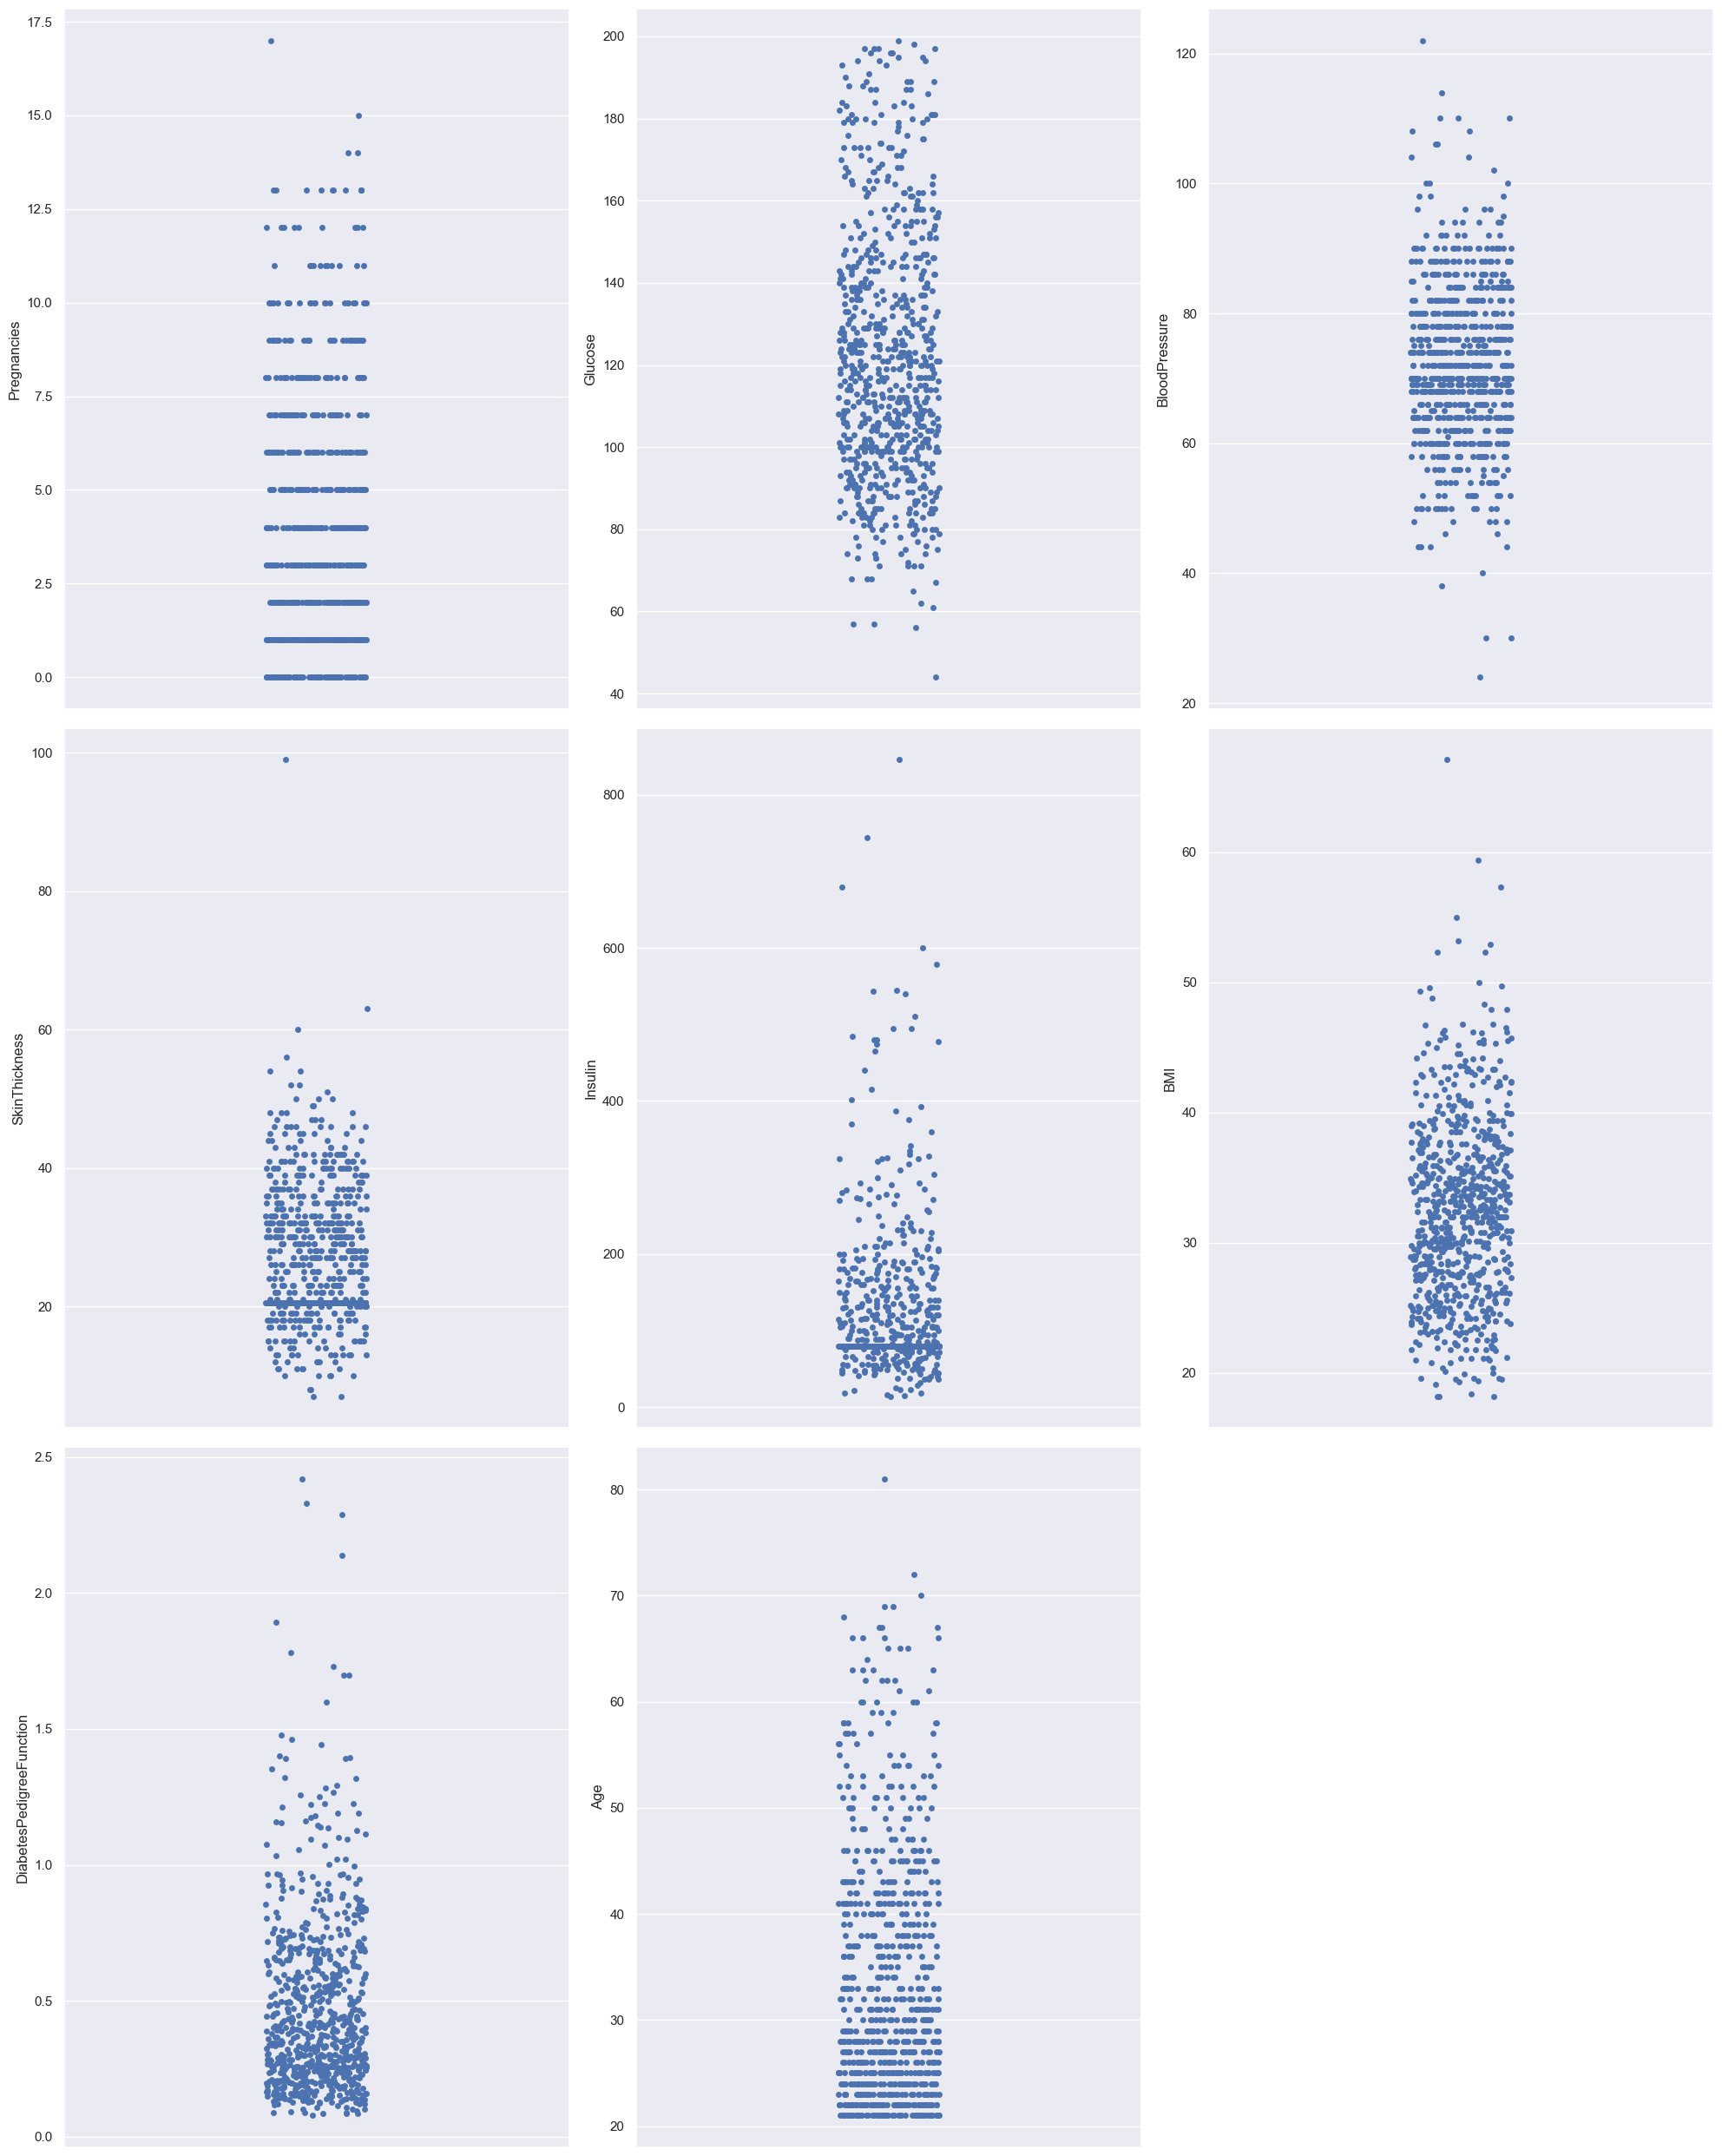

In [11]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(X[column])
    plotnumber+=1
plt.tight_layout()

Great!! Let's proceed by checking multicollinearity in the dependent variables.
Before that, we should scale our data. Let's use the standard scaler for that.


In [12]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [13]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

In [14]:
vif

,vif,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


In [15]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25)

In [16]:
# let's fit the data into kNN model and see how well it performs:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [17]:
y_pred = knn.predict(x_test)

In [18]:
knn.score(x_train,y_train)

0.8246527777777778

In [19]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.7291666666666666


In [20]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [21]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [22]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.681 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.739 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.817 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.722 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.687 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.707 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.739 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.783 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.722 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.765 total 

[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=9;, score=0.748 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=10;, score=0.698 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=10;, score=0.739 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=10;, score=0.774 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=10;, score=0.704 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=10;, score=0.730 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=11;, score=0.724 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=11;, score=0.765 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=11;, score=0.774 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=11;, score=0.713 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_si

c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 226, in predict
    neigh_ind = sel

[CV 5/5] END algorithm=brute, leaf_size=18, n_neighbors=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=18, n_neighbors=11;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=18, n_neighbors=11;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=18, n_neighbors=11;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=18, n_neighbors=11;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=18, n_neighbors=11;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=18, n_neighbors=12;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=18, n_neighbors=12;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=18, n_neighbors=12;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=18, n_neighbors=12;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=18, n_neighbors=12;, score=nan total time=   0.0s
[CV 1/5] E

c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 226, in predict
    neigh_ind = sel

[CV 4/5] END algorithm=brute, leaf_size=20, n_neighbors=5;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, n_neighbors=5;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, n_neighbors=7;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, n_neighbors=7;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, n_neighbors=7;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, n_neighbors=7;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, n_neighbors=7;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, n_neighbors=9;, score=nan total time=   0.0s


c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 226, in predict
    neigh_ind = sel

[CV 2/5] END algorithm=brute, leaf_size=20, n_neighbors=9;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, n_neighbors=9;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, n_neighbors=9;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, n_neighbors=9;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, n_neighbors=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, n_neighbors=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, n_neighbors=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, n_neighbors=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, n_neighbors=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, n_neighbors=11;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, n_neighbors=11;, score=nan total time=   0.0s
[CV 3/5] END a

c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 226, in predict
    neigh_ind = sel

[CV 5/5] END algorithm=brute, leaf_size=20, n_neighbors=13;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=25, n_neighbors=5;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=25, n_neighbors=5;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=25, n_neighbors=5;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=25, n_neighbors=5;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=25, n_neighbors=5;, score=nan total time=   0.0s
[CV 1/5] END algorit

c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 226, in predict
    neigh_ind = sel

[CV 5/5] END algorithm=brute, leaf_size=25, n_neighbors=9;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=25, n_neighbors=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=25, n_neighbors=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=25, n_neighbors=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=25, n_neighbors=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=25, n_neighbors=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=25, n_neighbors=11;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=25, n_neighbors=11;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=25, n_neighbors=11;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=25, n_neighbors=11;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=25, n_neighbors=11;, score=nan total time=   0.0s
[CV 1/5] EN

c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 226, in predict
    neigh_ind = sel

[CV 5/5] END algorithm=brute, leaf_size=25, n_neighbors=13;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=27, n_neighbors=3;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=27, n_neighbors=3;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=27, n_neighbors=3;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=27, n_neighbors=3;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=27, n_neighbors=3;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=27, n_neighbors=5;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=27, n_neighbors=5;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=27, n_neighbors=5;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=27, n_neighbors=5;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=27, n_neighbors=5;, score=nan total time=   0.0s
[CV 1/5] END algorit

c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 226, in predict
    neigh_ind = sel

[CV 5/5] END algorithm=brute, leaf_size=27, n_neighbors=9;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=27, n_neighbors=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=27, n_neighbors=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=27, n_neighbors=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=27, n_neighbors=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=27, n_neighbors=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=27, n_neighbors=11;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=27, n_neighbors=11;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=27, n_neighbors=11;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=27, n_neighbors=11;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=27, n_neighbors=11;, score=nan total time=   0.0s
[CV 1/5] EN

c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 226, in predict
    neigh_ind = sel

[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=3;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=3;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, n_neighbors=3;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, n_neighbors=3;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, n_neighbors=5;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=5;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=5;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, n_neighbors=5;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, n_neighbors=5;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, n_neighbors=7;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=7;, score=nan total time=   0.0s
[CV 3/5] END algorith

c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 226, in predict
    neigh_ind = sel

[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, n_neighbors=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, n_neighbors=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, n_neighbors=11;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=11;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=11;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, n_neighbors=11;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, n_neighbors=11;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, n_neighbors=12;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=12;, score=nan total time=   0.0s
[CV 3/5] E

c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 226, in predict
    neigh_ind = sel

[CV 2/5] END algorithm=brute, leaf_size=32, n_neighbors=7;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=32, n_neighbors=7;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=32, n_neighbors=7;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=32, n_neighbors=7;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=32, n_neighbors=9;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=32, n_neighbors=9;, score=nan total time=   0.0s


c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 226, in predict
    neigh_ind = sel

[CV 3/5] END algorithm=brute, leaf_size=32, n_neighbors=9;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=32, n_neighbors=9;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=32, n_neighbors=9;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=32, n_neighbors=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=32, n_neighbors=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=32, n_neighbors=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=32, n_neighbors=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=32, n_neighbors=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=32, n_neighbors=11;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=32, n_neighbors=11;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=32, n_neighbors=11;, score=nan total time=   0.0s
[CV 4/5] END 

c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 226, in predict
    neigh_ind = sel

[CV 3/5] END algorithm=brute, leaf_size=32, n_neighbors=13;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=32, n_neighbors=13;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=32, n_neighbors=13;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=34, n_neighbors=3;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=34, n_neighbors=3;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=34, n_neighbors=3;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=34, n_neighbors=3;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=34, n_neighbors=3;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=34, n_neighbors=5;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=34, n_neighbors=5;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=34, n_neighbors=5;, score=nan total time=   0.0s
[CV 4/5] END algor

c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 226, in predict
    neigh_ind = sel

[CV 3/5] END algorithm=brute, leaf_size=34, n_neighbors=9;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=34, n_neighbors=9;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=34, n_neighbors=9;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=34, n_neighbors=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=34, n_neighbors=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=34, n_neighbors=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=34, n_neighbors=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=34, n_neighbors=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=34, n_neighbors=11;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=34, n_neighbors=11;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=34, n_neighbors=11;, score=nan total time=   0.0s
[CV 4/5] END 

c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 429, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 666, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\PUJAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 226, in predict
    neigh_ind = sel

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [23]:
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 5}

### Doing gridsearchCV we can get best parameer by which we can increase the accuracy

In [24]:
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors=13)

In [25]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=13)

In [26]:
knn.score(x_train,y_train)

0.7881944444444444

Looks like accuracy for training has decreased, maybe our model was overfitting the data before. 
Let's see how it perfroms on the test data.

In [27]:
knn.score(x_test,y_test)

0.7708333333333334

Great, accuracy score has increased for our test data. So, indeed our model was overfitting before.
Now, it looks better.


Let's now use k-fold cross validation and check how well our model is generalizing over our dataset:
We are randomly selecting our k to be 12 for k fold.

In [28]:
#k-fold cross validation 
kfold = KFold(n_splits=12,random_state= None)
kfold.get_n_splits(X_scaled)

12

In [29]:
from statistics import mean
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =11)
cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index] # our scaled data is an array so it can work on x[value]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] # y is a dataframe so we have to use "iloc" to retreive data
    knn.fit(X_train,y_train)
    train_score_ = knn.score(X_train,y_train)
    test_score_ =  knn.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

for k =  1
train_score is :   0.8068181818181818 and test score is :   0.6875
for k =  2
train_score is :   0.7926136363636364 and test score is :   0.765625
for k =  3
train_score is :   0.7954545454545454 and test score is :   0.78125
for k =  4
train_score is :   0.7997159090909091 and test score is :   0.734375
for k =  5
train_score is :   0.7940340909090909 and test score is :   0.65625
for k =  6
train_score is :   0.7954545454545454 and test score is :   0.765625
for k =  7
train_score is :   0.7997159090909091 and test score is :   0.703125
for k =  8
train_score is :   0.7926136363636364 and test score is :   0.734375
for k =  9
train_score is :   0.7840909090909091 and test score is :   0.890625
for k =  10
train_score is :   0.7997159090909091 and test score is :   0.796875
for k =  11
train_score is :   0.7997159090909091 and test score is :   0.734375
for k =  12
train_score is :   0.7911931818181818 and test score is :   0.8125
*******************************************

([<matplotlib.axis.YTick at 0x145279037c0>,
 [Text(0, 0.65, '0.65'),
  Text(0, 0.7000000000000001, '0.70'),
  Text(0, 0.7500000000000001, '0.75'),
  Text(0, 0.8000000000000002, '0.80'),
  Text(0, 0.8500000000000002, '0.85'),
  Text(0, 0.9000000000000002, '0.90'),
  Text(0, 0.9500000000000003, '0.95')])

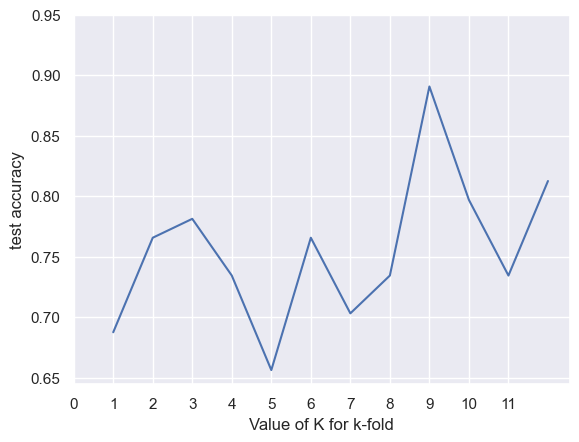

In [30]:
# let's plot the test_accuracy with the value of k in k-fold

plt.plot(count,test_score)
plt.xlabel('Value of K for k-fold')
plt.ylabel('test accuracy')
plt.xticks(np.arange(0, 12, 1)) 
plt.yticks(np.arange(0.65, 1, 0.05)) 

Average train score is :   0.7959280303030303


Average test score is :   0.7552083333333334

Our cross validation tells that on an avergae our model has a 75% accuracy on our test data.
so, that's how we can use cross validation to compute how well our model is generalizing on our data.

We can also use cross valdition score to opt between different models or to do hyperparameter tuning.

In [32]:
# let's save the model
import pickle

with open("E:/Diabetes using KNN/model"+ '/modelForPrediction.pkl', 'wb') as f:
    pickle.dump(knn,f)
    
with open("E:/Diabetes using KNN/model"+ '/standardScalar.pkl', 'wb') as f:
    pickle.dump(scalar,f)